In [6]:
#get nasdaq data after creating a nasdaq account
!pip install nasdaq-data-link

In [7]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Set-up

import nasdaqdatalink as ndl# You could also do something like: import nasdaqdatalink as ndl
import pandas_datareader as pdr

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib as mpl 

import matplotlib.pyplot as plt

# nasdaqdatalink.ApiConfig.api_key = 'YOUR_KEY_HERE'

nasdaqdatalink.read_key()

#nasdaqdatalink.read_key(filepath="/data/.corporatenasdaqdatalinkapikey")
#print(nasdaqdatalink.ApiConfig.api_key)

In [9]:
mydata=nasdaqdatalink.get('FRED/GDP')

In [10]:
mydata

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


In [11]:
btc = nasdaqdatalink.get('BCHAIN/MKPRU')
btc.tail()

,Value
Date,
2023-03-16,24376.39
2023-03-17,25053.64
2023-03-18,27462.77
2023-03-19,26975.39
2023-03-20,28045.84


In [12]:
btc['ret'] = btc.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

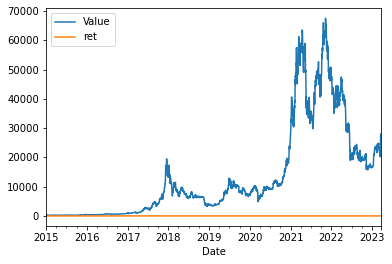

In [13]:
btc = btc.loc['2015-01-01':,['Value', 'ret']]
btc.plot()

In [14]:
print(f'Average return: {100 * btc.ret.mean():.2f}%')

Average return: 0.23%


In [15]:
btc['ret_g'] = btc.ret.add(1) # gross return
btc['ret_c'] = btc.ret_g.cumprod().sub(1)    # cummulative return
btc

,Value,ret,ret_g,ret_c
Date,,,,
2015-01-01,316.15,0.001425,1.001425,0.001425
2015-01-02,314.81,-0.004238,0.995762,-0.002819
2015-01-03,270.93,-0.139386,0.860614,-0.141812
2015-01-04,276.80,0.021666,1.021666,-0.123218
2015-01-05,263.17,-0.049241,0.950759,-0.166392
...,...,...,...,...
2023-03-16,24376.39,-0.015790,0.984210,76.213779
2023-03-17,25053.64,0.027783,1.027783,78.359012
2023-03-18,27462.77,0.096159,1.096159,85.990086


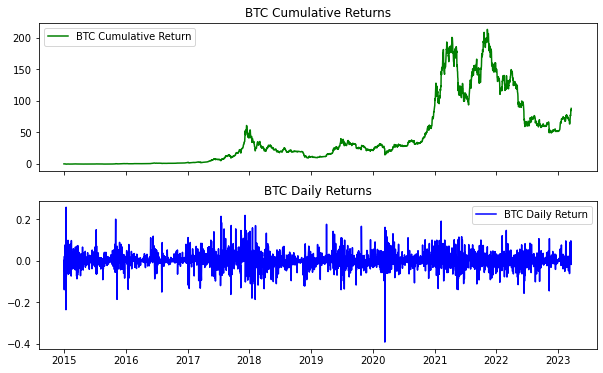

In [16]:
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10, 6))

axs[0].plot(btc.ret_c, 'g', label = 'BTC Cumulative Return')
axs[1].plot(btc.ret, 'b', label = 'BTC Daily Return')
            
axs[0].set_title('BTC Cumulative Returns')
axs[1].set_title('BTC Daily Returns')

axs[0].legend()
axs[1].legend();